<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **Recurrent Neural Networks**

Instructor: Dr. Kambiz Saffarizadeh

---

A basic neural network (what we saw before).

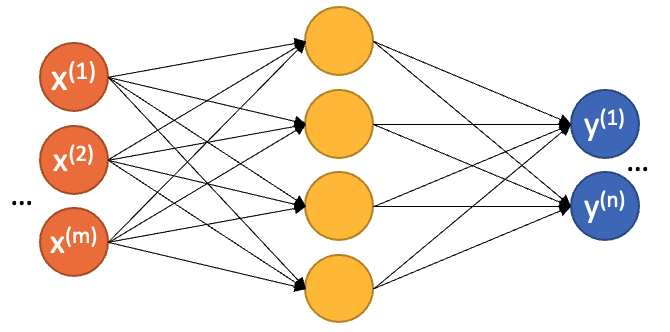

Let's represent the hidden layers by a single box (a black-box!).

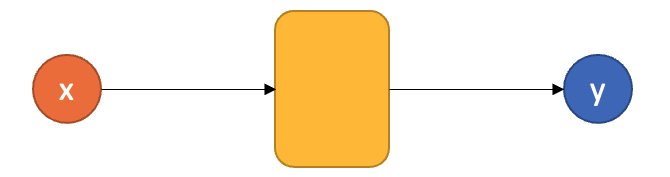

Let's rotate the figure and repeat it for each time step.

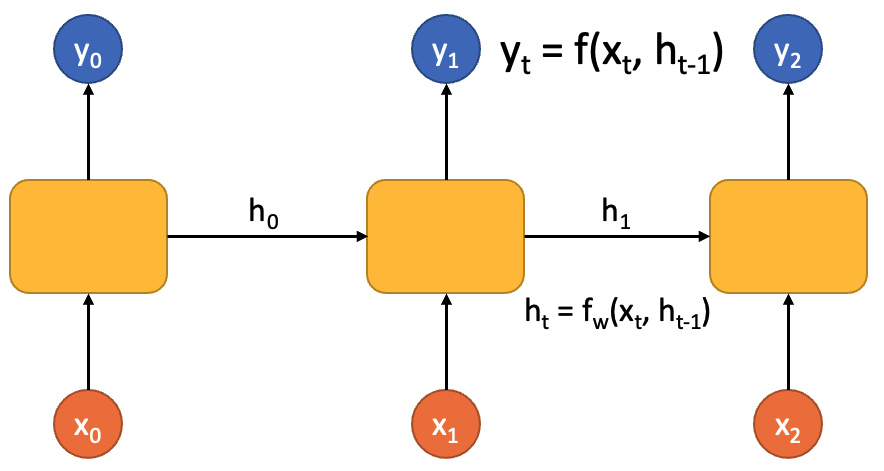

Let's create a model like this in the context of natural language processing.

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import string

# Data

In [2]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [3]:
!wget https://raw.githubusercontent.com/ashwaniYDV/sarcasm-detection-tensorflow/main/sarcasm.json

--2023-04-17 18:17:45--  https://raw.githubusercontent.com/ashwaniYDV/sarcasm-detection-tensorflow/main/sarcasm.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5616834 (5.4M) [text/plain]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.36M  --.-KB/s    in 0.1s    

2023-04-17 18:17:46 (39.7 MB/s) - ‘sarcasm.json’ saved [5616834/5616834]



In [4]:
with open("sarcasm.json", 'r') as f:
    dataset = json.load(f)

In [5]:
dataset[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [6]:
def clean_document(document):
  document = document.lower()
  document = document.replace(',', ' , ')
  document = document.replace('.', ' . ')
  document = document.replace('-', ' - ')
  document = document.replace('/', ' / ')
  soup = BeautifulSoup(document)
  document = soup.get_text()
  words = document.split()
  filtered_document = ''
  for word in words:
    word = word.translate(table)
    if word not in stopwords:
      filtered_document = filtered_document + word + ' '
  return filtered_document

In [7]:
documents = []
labels = []
urls = []

for item in dataset:
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])
  document = clean_document(item['headline'])
  documents.append(document)

<ipython-input-6-168d8e305f25>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(document)


# Vectorization

In [8]:
vocab_size = 2000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

In [9]:
training_docs = documents[0:training_size]
validation_docs = documents[training_size:]

training_labels = labels[0:training_size]
validation_labels = labels[training_size:]

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_docs)
word_index = tokenizer.word_index

In [11]:
training_sequences = tokenizer.texts_to_sequences(training_docs)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_docs)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

In [13]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
validation_padded = np.array(validation_padded)
validation_labels = np.array(validation_labels)

# Model

In [14]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          32000     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              93600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                4824      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 130,449
Trainable params: 130,449
Non-trainable params: 0
_________________________________________________________________


FYI: Inside each LSTM cell may look like the following figure.

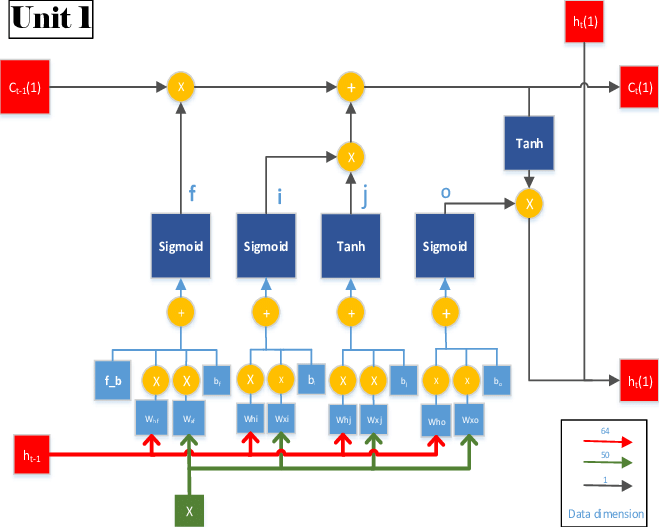

Credit: Wen, S., Wei, H., Yang, Y., Guo, Z., Zeng, Z, 2019 "Memristive LSTM Network for Sentiment Analysis," IEEE TRANSACTIONS ON SYSTEMS MAN AND CYBERNETICS: SYSTEMS

In [16]:
history1 = model1.fit(training_padded, training_labels, epochs=20, validation_data=(validation_padded, validation_labels))

# To reduce the wait time in the classroom, we run the model with only 20 epochs.
# But we need 100-150 epochs to better investigate the learning curves.

Epoch 1/20
719/719 [==============================] - 32s 30ms/step - loss: 0.8665 - accuracy: 0.6983 - val_loss: 0.5138 - val_accuracy: 0.7538
Epoch 2/20
719/719 [==============================] - 10s 14ms/step - loss: 0.5124 - accuracy: 0.7750 - val_loss: 0.4986 - val_accuracy: 0.7622
Epoch 3/20
719/719 [==============================] - 9s 12ms/step - loss: 0.4387 - accuracy: 0.8022 - val_loss: 0.4760 - val_accuracy: 0.7835
Epoch 4/20
719/719 [==============================] - 9s 12ms/step - loss: 0.4165 - accuracy: 0.8157 - val_loss: 0.4575 - val_accuracy: 0.7897
Epoch 5/20
719/719 [==============================] - 9s 12ms/step - loss: 0.4127 - accuracy: 0.8187 - val_loss: 0.4766 - val_accuracy: 0.7897
Epoch 6/20
719/719 [==============================] - 10s 14ms/step - loss: 0.3775 - accuracy: 0.8352 - val_loss: 0.4511 - val_accuracy: 0.7929
Epoch 7/20
719/719 [==============================] - 8s 11ms/step - loss: 0.3639 - accuracy: 0.8447 - val_loss: 0.4633 - val_accuracy: 0.7

In [17]:
def plot_graphs(history, set_name):
  plt.plot(history.history[set_name])
  plt.plot(history.history['val_' + set_name])
  plt.xlabel("Epochs")
  plt.ylabel(set_name)
  plt.legend([set_name, 'val_' + set_name])
  plt.show()

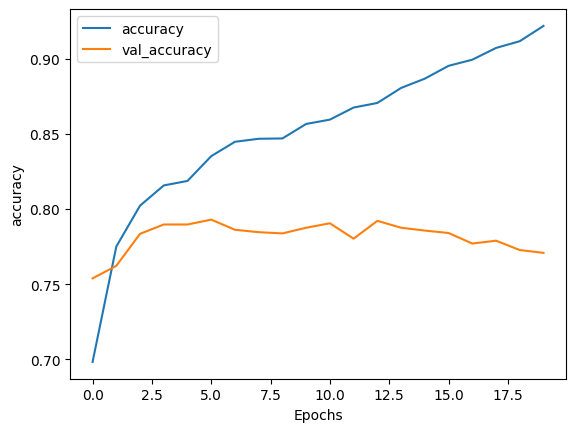

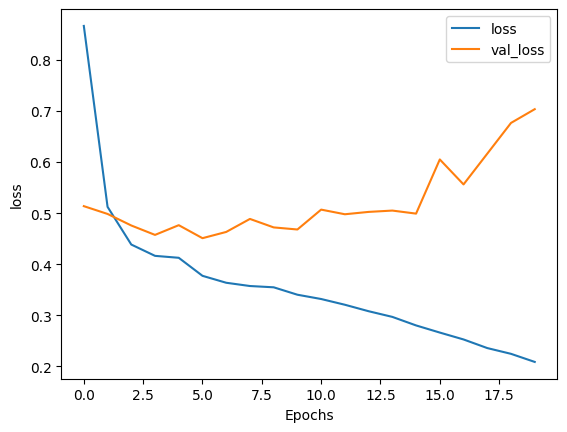

In [18]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

# Revised Model

In [19]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.000008),
               metrics = ['accuracy'])

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          32000     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 200)        93600     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                4824      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 371,249
Trainable params: 371,249
Non-tr

In [21]:
history2 = model2.fit(training_padded, training_labels, epochs=20, validation_data=(validation_padded, validation_labels))

# To reduce the wait time in the classroom, we run the model with only 20 epochs.
# But we need 100-150 epochs to better investigate the learning curves.

Epoch 1/20
719/719 [==============================] - 39s 37ms/step - loss: 0.6901 - accuracy: 0.5540 - val_loss: 0.6850 - val_accuracy: 0.5700
Epoch 2/20
719/719 [==============================] - 16s 22ms/step - loss: 0.6847 - accuracy: 0.5596 - val_loss: 0.6807 - val_accuracy: 0.5700
Epoch 3/20
719/719 [==============================] - 15s 20ms/step - loss: 0.6821 - accuracy: 0.5596 - val_loss: 0.6771 - val_accuracy: 0.5697
Epoch 4/20
719/719 [==============================] - 15s 22ms/step - loss: 0.6748 - accuracy: 0.5662 - val_loss: 0.6631 - val_accuracy: 0.6153
Epoch 5/20
719/719 [==============================] - 15s 20ms/step - loss: 0.6499 - accuracy: 0.6181 - val_loss: 0.6375 - val_accuracy: 0.6328
Epoch 6/20
719/719 [==============================] - 15s 21ms/step - loss: 0.6320 - accuracy: 0.6399 - val_loss: 0.6209 - val_accuracy: 0.6522
Epoch 7/20
719/719 [==============================] - 15s 21ms/step - loss: 0.6128 - accuracy: 0.6597 - val_loss: 0.5987 - val_accuracy:

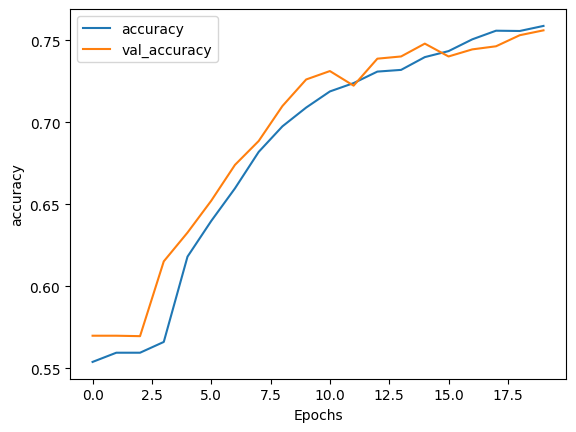

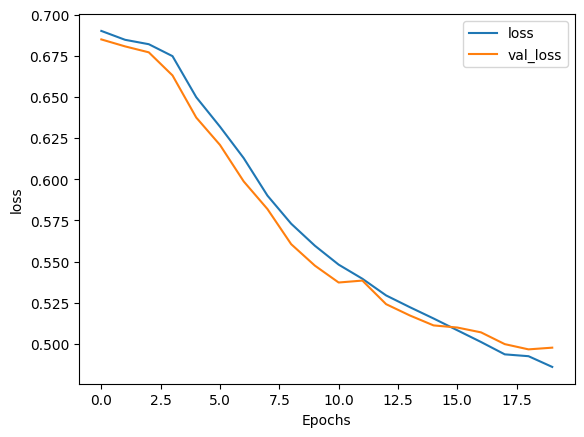

In [22]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

# Using the Models

In [23]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in High School they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]

In [24]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [25]:
predictions1 = model1.predict(test_padded)
predictions1

1/1 [==============================] - 1s 969ms/step


array([[0.993386  ],
       [0.62377644],
       [0.22184566],
       [0.99166626]], dtype=float32)

In [26]:
predictions2 = model2.predict(test_padded)
predictions2

1/1 [==============================] - 2s 2s/step


array([[0.33252603],
       [0.32955983],
       [0.8630514 ],
       [0.8900272 ]], dtype=float32)

# Saving the Embeddings

In [27]:
weights1 = model1.layers[0].get_weights()[0]

In [28]:
weights2 = model2.layers[0].get_weights()[0]

In [29]:
weights1.shape

(2000, 16)

In [30]:
reverse_word_index = {}

for (key, value) in word_index.items():
  reverse_word_index[value] = key

# Alternative code:
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [31]:
import pandas as pd

In [32]:
df1 = pd.DataFrame(weights1)
df1['word'] = [reverse_word_index[word_num] for word_num in range(1, vocab_size+1)]
df1 = df1.set_index('word')
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
word,,,,,,,,,,,,,,,,
<OOV>,-0.024669,0.016268,-0.074580,0.019169,0.022324,-0.033660,-0.022109,0.015321,-0.045995,0.004351,-0.064339,-0.018481,-0.015771,-0.034676,0.010716,0.112181
new,-0.000182,-0.032297,0.023418,-0.031376,-0.005719,-0.008316,-0.001047,0.009930,0.098710,0.040020,-0.032269,0.029939,0.052543,0.090700,0.023504,0.013856
trump,-0.088491,0.016544,0.046450,0.116659,0.040627,0.066432,0.004638,0.102079,0.012750,0.191746,0.059045,-0.058733,-0.023992,0.058100,0.033251,0.039556
man,0.166709,0.066579,-0.111792,-0.133166,0.028036,-0.133815,-0.188081,-0.109915,-0.277962,-0.224590,-0.122591,-0.283460,-0.167392,-0.277964,-0.174248,0.086645
not,-0.222504,-0.110422,0.231414,0.202339,0.161926,0.111264,0.122542,0.273777,0.247528,0.276795,0.160390,0.074176,0.153805,0.155322,0.122340,-0.074293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
laid,0.148346,0.137932,0.013448,-0.175734,-0.061349,-0.087633,-0.086908,-0.162605,-0.246962,-0.172405,-0.052544,-0.128292,-0.137339,-0.301483,-0.251410,-0.036871
add,-0.151755,-0.012197,-0.075849,0.187777,0.074244,-0.144855,-0.090994,0.140215,0.098522,0.185148,-0.020499,-0.293622,0.004452,0.168732,0.132190,-0.014590
communities,-0.163498,-0.141660,0.130569,0.213125,0.318009,0.106484,0.091476,0.119202,0.036475,-0.080251,0.284874,-0.156410,0.087575,-0.012887,0.014828,-0.290144


In [33]:
df2 = pd.DataFrame(weights2)
df2['word'] = [reverse_word_index[word_num] for word_num in range(1, vocab_size+1)]
df2 = df2.set_index('word')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
word,,,,,,,,,,,,,,,,
<OOV>,0.024192,0.012647,0.024373,-0.023635,-0.056826,0.011089,-0.008771,0.040518,-0.001349,0.002784,0.011542,-0.007961,0.005348,-0.017534,0.015583,0.034796
new,0.009984,-0.018792,-0.003435,0.057067,0.054882,-0.013400,0.010224,0.010840,-0.002101,-0.007570,0.026249,-0.002519,-0.051752,0.032217,-0.027997,0.047244
trump,0.022413,0.031570,-0.041833,-0.030461,-0.032174,0.004680,0.016851,-0.040384,-0.044463,-0.022879,0.031451,0.016904,0.027563,-0.030678,-0.045538,0.004617
man,-0.011384,0.072246,0.053272,0.014491,-0.029891,-0.065786,-0.037500,0.046009,0.072402,0.025153,0.015434,-0.074120,0.005505,-0.043669,0.071091,-0.014292
not,-0.063901,-0.059279,-0.055896,-0.019317,0.058660,0.069901,-0.012959,-0.045805,-0.034313,-0.061497,0.000787,0.017200,-0.041926,0.028385,-0.061433,0.007512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
laid,-0.026618,0.059484,0.049331,-0.046897,-0.039024,-0.020925,0.004818,0.024070,0.021280,-0.008445,-0.003614,-0.043193,0.025948,-0.032896,0.044849,0.020985
add,-0.013130,0.003560,0.043437,0.013775,0.018409,0.022282,-0.015072,-0.007792,-0.013877,0.011685,0.004377,0.016716,-0.050420,0.019441,0.035629,-0.040679
communities,-0.043458,0.037146,-0.056262,0.007259,0.036402,0.035367,-0.001860,-0.008511,-0.033371,0.007549,0.018859,0.030461,-0.007938,0.041620,-0.025384,0.023259


In [34]:
from scipy import spatial

In [35]:
1 - spatial.distance.cosine(df1.loc['trump'], df1.loc['trump'])

1

Model 1

In [36]:
1 - spatial.distance.cosine(df1.loc['biden'], df1.loc['sanders'])

0.7489911913871765

In [37]:
1 - spatial.distance.cosine(df1.loc['biden'], df1.loc['trump'])

-0.42320650815963745

Model 2

In [38]:
1 - spatial.distance.cosine(df2.loc['biden'], df2.loc['sanders'])

0.14177466928958893

In [39]:
1 - spatial.distance.cosine(df2.loc['biden'], df2.loc['trump'])

-0.3914157450199127